In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Error loading stopwords: <urlopen error [Errno 65] No
[nltk_data]     route to host>


In [3]:
data = pd.read_csv('flipkart_data.csv')
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [5]:
# unique ratings
pd.unique(data['rating'])


array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

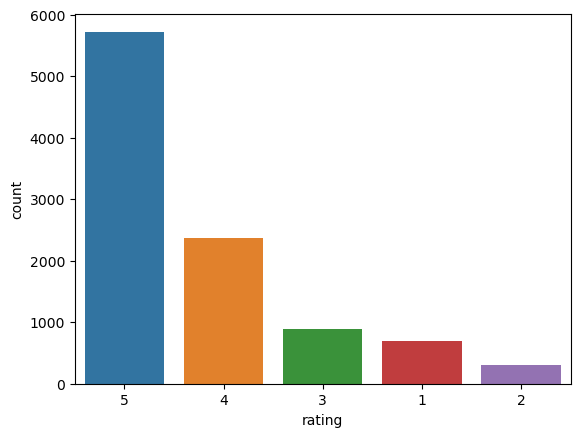

In [6]:
sns.countplot(data=data,
			x='rating',
			order=data.rating.value_counts().index)


In [7]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
	if data['rating'][i] >= 5:
		pos_neg.append(1)
	else:
		pos_neg.append(0)

data['label'] = pos_neg


In [8]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))

	return preprocessed_text


In [9]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review


  0%|                                                                                                                                                                            | 0/9976 [00:00<?, ?it/s]


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/apple/nltk_data'
    - '/Users/apple/anaconda3/nltk_data'
    - '/Users/apple/anaconda3/share/nltk_data'
    - '/Users/apple/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [10]:
data.head()


,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [11]:
data["label"].value_counts()


1    5726
0    4250
Name: label, dtype: int64

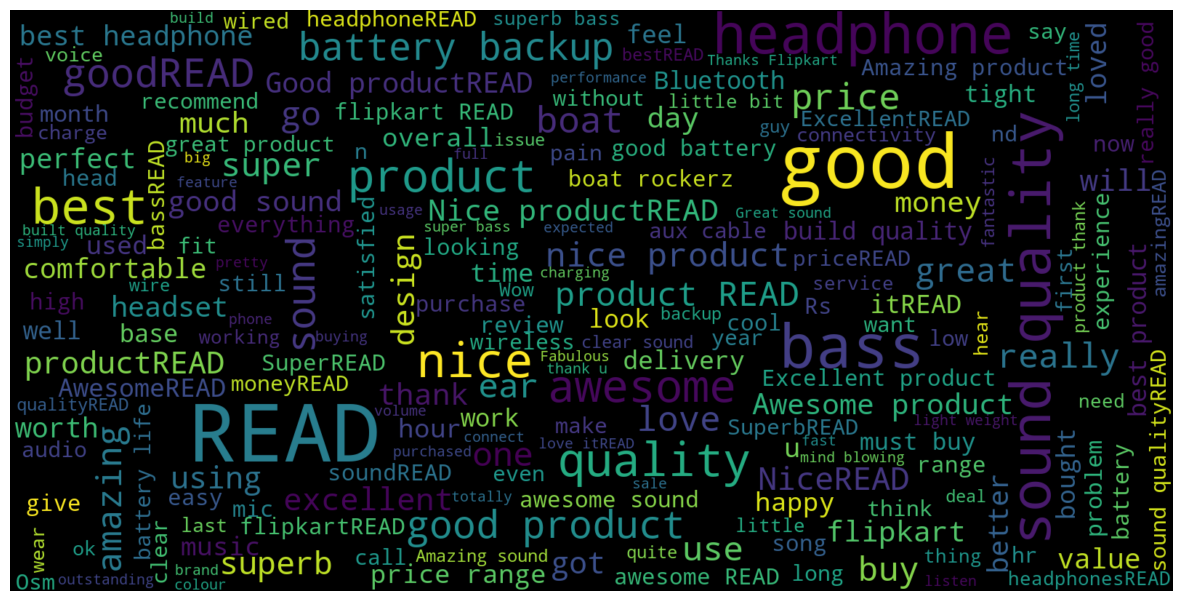

In [12]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()


In [14]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))


0.9362561723776747


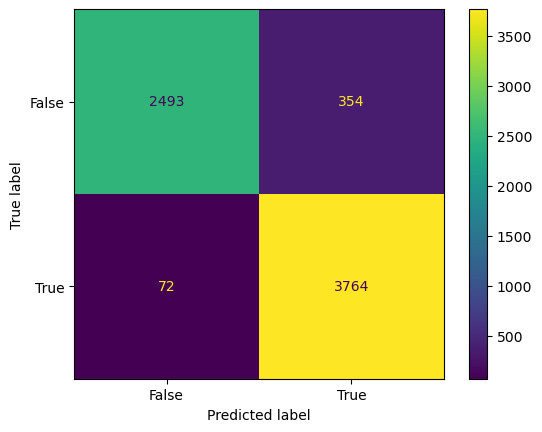

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()
